source: https://www.kaggle.com/hoonkeng/deep-analysis-on-youtube-trending-videos-eda/notebook


In [6]:
#The goal of this project is to understand, why some countries are more 
#engaged whith views, likes and dislikes compared to other countries.

In [7]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
path = 'YoutubePrjData'
filename1 = os.path.join('..',path,'dataframe.csv')
filename2 = os.path.join('..', path,'dataframe_all_timestamps.csv')

df = pd.read_csv(filename1)
df_all_timestamps = pd.read_csv(filename2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171149 entries, 0 to 171148
Data columns (total 19 columns):
video_id                  171149 non-null object
trending_date             171149 non-null object
title                     171149 non-null object
channel_title             171149 non-null object
category_id               171149 non-null int64
category                  171149 non-null object
publish_date              171149 non-null object
publish_time              171149 non-null object
tags                      171149 non-null object
views                     171149 non-null int64
likes                     171149 non-null int64
dislikes                  171149 non-null int64
comment_count             171149 non-null int64
thumbnail_link            171149 non-null object
comments_disabled         171149 non-null bool
ratings_disabled          171149 non-null bool
video_error_or_removed    171149 non-null bool
description               171149 non-null object
country           

In [10]:
df_all_timestamps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356350 entries, 0 to 356349
Data columns (total 19 columns):
video_id                  356350 non-null object
trending_date             356350 non-null object
title                     356350 non-null object
channel_title             356350 non-null object
category_id               356350 non-null int64
category                  356350 non-null object
publish_date              356350 non-null object
publish_time              356350 non-null object
tags                      356350 non-null object
views                     356350 non-null int64
likes                     356350 non-null int64
dislikes                  356350 non-null int64
comment_count             356350 non-null int64
thumbnail_link            356350 non-null object
comments_disabled         356350 non-null bool
ratings_disabled          356350 non-null bool
video_error_or_removed    356350 non-null bool
description               356350 non-null object
country           

In [11]:
#I started my project with a simple count of video uploads group by country.
#The following graph shows which country has the highest amount of video counts
#and which has the lowest count.

In [12]:
counts1 = df['country'].value_counts()
counts1

RU    30783
MX    27900
FR    24085
DE    22965
CA    17338
IN    15222
KR    13793
JP    10808
US     5185
GB     3070
Name: country, dtype: int64

Text(0, 0.5, 'Number of uploads per category')

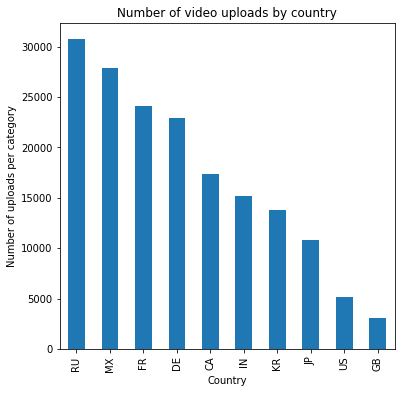

In [13]:
fig = plt.figure(figsize=(6,6)) # define plot area
ax = fig.gca() # define axis 

counts1.plot.bar(ax = ax) # Use the plot.bar method on the counts data frame

ax.set_title('Number of video uploads by country') # Give the plot a main title
ax.set_xlabel('Country') # Set text for the x axis
ax.set_ylabel('Number of uploads per category')# Set text for y axis

In [14]:
#Next: I tried to understand which countries had the highest number of 
#engagements in terms of (likes, disklikes, views)

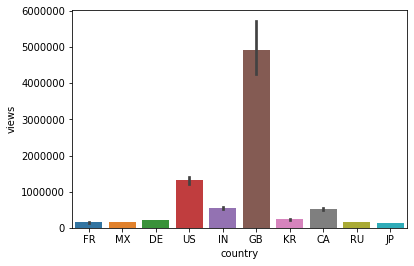

In [15]:
ax = sns.barplot(x= 'country', y='views', data= df)

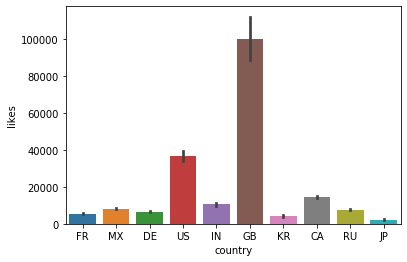

In [16]:
ax = sns.barplot(x= 'country', y='likes', data= df) #Eventhough GB is the least active country in video uploads, GB 
#is most active country in views, likes, dislikes, comment_count engagements.

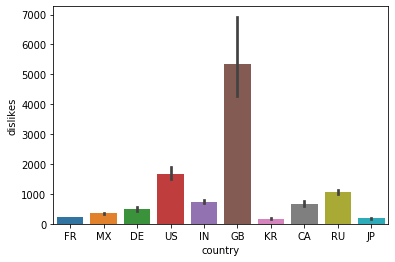

In [17]:
ax = sns.barplot(x= 'country', y='dislikes', data= df) 

In [18]:
#The first finding in my analysis was that:
#The country with the least count of videos, has the highest engagements
#compared with all the countries.
#I wanted to further my analysis and understand if the engagements are 
#stable in all the videos, or is it a few videos that have significant large
#amount of views and they make GB superior compared to the other countries.

In [19]:
df.loc[df['country'] == 'GB'] #I created a dataframe only about GB.

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
432,rHwDegptbI4,2017-11-14,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,News & Politics,2017-11-13,01:45:13,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,GB
433,AumaWl0TNBo,2017-11-14,How My Relationship Started!,PointlessBlogVlogs,24,Entertainment,2017-11-11,17:00:00,"pointlessblog|""pointlessblogtv""|""pointlessblog...",1182775,52708,1431,2333,https://i.ytimg.com/vi/AumaWl0TNBo/default.jpg,False,False,False,► HOW MY RELATIONSHIP STARTED!\n► PB Merch • h...,GB
434,-N5eucPMTTc,2017-11-14,CHRISTMAS HAS GONE TO MY HEAD,MoreZoella,22,People & Blogs,2017-11-10,19:19:43,"zoe sugg|""zoella""|""zoe""|""vlog""|""vlogging""|""vlo...",1164201,57309,749,624,https://i.ytimg.com/vi/-N5eucPMTTc/default.jpg,False,False,False,CHRISTMAS HAS GONE TO MY HEAD\nPrevious Vlog: ...,GB
436,fiusxyygqGk,2017-11-14,Marshmello - You & Me (Official Music Video),marshmello,10,Music,2017-11-10,15:00:03,"selena gomez wolves|""alone marshmello""|""marshm...",3407008,207262,3167,13279,https://i.ytimg.com/vi/fiusxyygqGk/default.jpg,False,False,False,PURCHASE YOU & ME HERE ▶ https://smarturl.it/m...,GB
466,mCx26FLXWuI,2017-11-14,Seth Rollins & Dean Ambrose vs. Cesaro & Sheam...,WWE,17,Sports,2017-11-07,04:52:25,"wwe|""world wrestling entertainment""|""wrestling...",1689382,24186,3330,3414,https://i.ytimg.com/vi/mCx26FLXWuI/default.jpg,False,False,False,In a main event with enormous Survivor Series ...,GB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170148,oTn329CjrRA,2018-06-14,LeBron James and Draymond Green Face Off in NB...,UNINTERRUPTED,17,Sports,2018-06-11,17:28:35,"UNINTERRUPTED|""lebron james""|""cleveland cavali...",129026,1638,29,275,https://i.ytimg.com/vi/oTn329CjrRA/default.jpg,False,False,False,The Cavs and Warriors stars' routines for the ...,GB
170149,VhQmTmqcEY0,2018-06-14,Juanes - Pa Dentro,JuanesVEVO,10,Music,2018-06-01,02:00:01,"Juanes|""Pa""|""Dentro""|""Universal""|""Music""|""Lati...",21853809,78212,5701,4780,https://i.ytimg.com/vi/VhQmTmqcEY0/default.jpg,False,False,False,Music video by Juanes performing Pa Dentro. © ...,GB
170150,ek1ePFp-nBI,2018-06-14,Halloween - Official Trailer (HD),Universal Pictures,24,Entertainment,2018-06-08,14:00:03,"halloween|""horror""|""horror movie""|""scary movie...",12955997,200539,7647,35147,https://i.ytimg.com/vi/ek1ePFp-nBI/default.jpg,False,False,False,"This October, Michael Myers returns. Watch the...",GB
170151,QRyzwPzxpcs,2018-06-14,Sea of Thieves - E3 2018 - Cursed Sails and Fo...,Xbox,20,Gaming,2018-06-10,20:29:46,"Xbox|""Xbox360""|""xbox 360""|""Xbox One""|""Rare""|""S...",1152245,2810,247,520,https://i.ytimg.com/vi/QRyzwPzxpcs/default.jpg,False,False,False,Sea of Thieves' world continues to evolve in t...,GB


In [20]:
gb_df = df.loc[df['country'] == 'GB']

In [21]:
#The category with the most video counts in GB is Music, 
#followed by Entertainment.

In [22]:
counts = gb_df['category'].value_counts()
counts

Music                    844
Entertainment            787
People & Blogs           268
Sports                   203
Film & Animation         184
Howto & Style            183
Comedy                   181
Gaming                   166
News & Politics          116
Science & Technology      37
Education                 37
Pets & Animals            36
Autos & Vehicles          14
Travel & Events           10
Nonprofits & Activism      3
Shows                      1
Name: category, dtype: int64

In [23]:
gb_df1 =gb_df.sort_values(by=['views']) #views in GB sorted

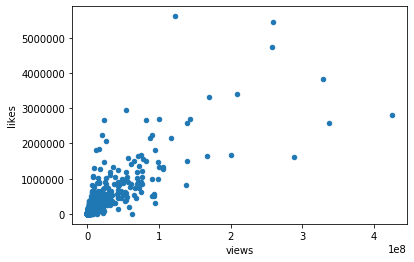

In [24]:
gb_df1.plot.scatter(x='views', y='likes')

#This graph shows the relationship between likes and views. We can clearly 
#see that the majority of videos is within 0-10mill likes and only a few 
#of them exceed this trend.

In [26]:
def approval(row):
    return (row['likes'])/(row['views']) * 100


In [27]:
gb_df1.loc[:,'approval_rating'] = gb_df1.apply(approval,axis=1)

appr_sorted = gb_df1.sort_values('approval_rating', ascending=False)

In [28]:
appr_sorted.head(10)

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,approval_rating
66133,mXfyOYAdCUc,2018-02-05,WHAT AM I?,KickThePj,1,Film & Animation,2018-01-27,22:03:43,"kickthepj|""pjthekick""|""robot""|""short film""|""sh...",82117,16840,75,1580,https://i.ytimg.com/vi/mXfyOYAdCUc/default.jpg,False,False,False,the story of a confused robot whose primary pu...,GB,20.507325
33779,t6Bi_0q_17Y,2017-12-26,LAY 레이 'Goodbye Christmas (聖誕又至)' MV,SMTOWN,10,Music,2017-12-22,15:00:08,"LAY|""레이""|""张艺兴""|""Winter Special Gift""|""Goodbye ...",779273,157675,549,8975,https://i.ytimg.com/vi/t6Bi_0q_17Y/default.jpg,False,False,False,LAY's Digital Album Winter Special Gift has be...,GB,20.233602
119561,VM-g_bkFdzo,2018-04-07,[STATION] TEN 텐 'New Heroes' MV,SMTOWN,10,Music,2018-04-06,09:00:05,"NCT|""텐""|""TEN""|""SM STATION""|""슴스테""|""New Heroes""|...",1113267,206212,507,19119,https://i.ytimg.com/vi/VM-g_bkFdzo/default.jpg,False,False,False,"The 52nd STATION track, TEN's New Heroes has b...",GB,18.523140
47826,PmH948yZwhE,2018-01-13,[STATION] NCT U '텐데... (Timeless)' Live Video,SMTOWN,10,Music,2018-01-12,11:00:01,"NCT U|""NCT""|""재현""|""도영""|""태일""|""JAEHYUN""|""DOYOUNG""...",334870,60743,172,4954,https://i.ytimg.com/vi/PmH948yZwhE/default.jpg,False,False,False,NCT U's STATION track 텐데… (Timeless) (Sung by ...,GB,18.139278
51733,CFwXUarN-wg,2018-01-18,GOALS GOALS GOALS,KickThePj,1,Film & Animation,2018-01-07,16:30:41,"kickthepj|""pjthekick""|""goals""|""2018 goals""|""re...",91867,16140,29,1018,https://i.ytimg.com/vi/CFwXUarN-wg/default.jpg,False,False,False,support the patreon! https://patreon.com/kickt...,GB,17.568877
79489,n1PrGpIekYY,2018-02-21,Niall Horan - On The Loose (Lyric Video),NiallHoranVEVO,10,Music,2018-02-12,17:00:07,"Niall|""Horan""|""Niall Horan""|""On The Loose""|""ly...",762622,131042,955,10132,https://i.ytimg.com/vi/n1PrGpIekYY/default.jpg,False,False,False,Listen to ‘On The Loose’ everywhere now: http:...,GB,17.183087
52767,3rVFuscWyC8,2018-01-19,The Old Me,ConnorFranta,22,People & Blogs,2018-01-08,21:02:06,"Connor Franta|""ConnorFranta""|""the old me""|""old...",167929,28657,144,1173,https://i.ytimg.com/vi/3rVFuscWyC8/default.jpg,False,False,False,Subscribe to my channel here: http://bit.ly/1g...,GB,17.064950
11179,2Zvmi5BzDbs,2017-11-27,Tour Documentary - Episode 3,Camila Cabello,10,Music,2017-11-14,00:00:36,"tour doc|""bruno mars""|""24k magic tour""|""world ...",128916,21727,59,1056,https://i.ytimg.com/vi/2Zvmi5BzDbs/default.jpg,False,False,False,Here's the last episode of my Tour Doc from th...,GB,16.853610
91415,YuAA5DEXbG4,2018-03-06,it me ur valentine,doddlevloggle,24,Entertainment,2018-02-14,19:07:15,"evans|""dumb""|""vid""|""valentines""|""dodie""|""ukulele""",362640,59242,173,3961,https://i.ytimg.com/vi/YuAA5DEXbG4/default.jpg,False,False,False,play again: https://www.youtube.com/watch?v=nt...,GB,16.336311
95583,UdRZLPG_xUM,2018-03-11,How I Changed My Life In One Week (this video ...,LukeIsNotSexy,22,People & Blogs,2018-03-02,19:30:23,"productivity hacks|""how to change your life""|""...",40634,6603,17,598,https://i.ytimg.com/vi/UdRZLPG_xUM/default.jpg,False,False,False,This video could change your life...\nfollow m...,GB,16.249938


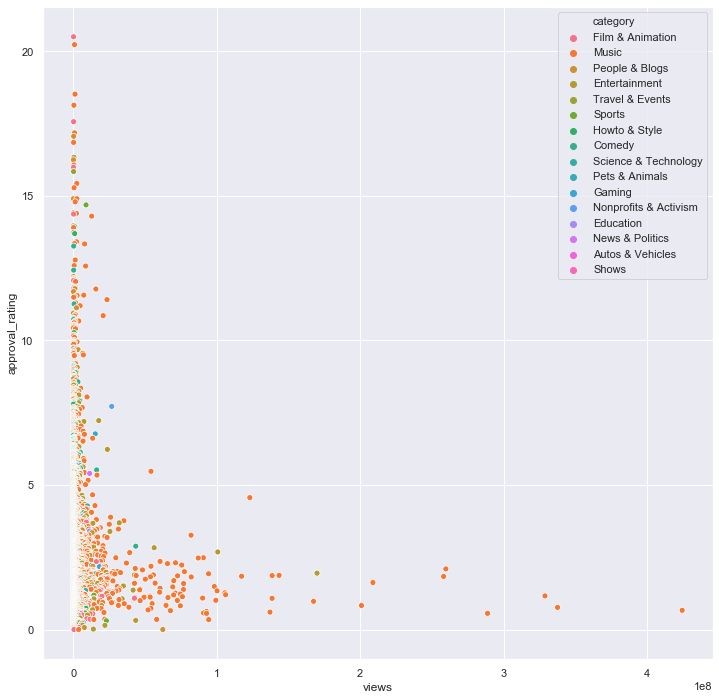

In [135]:
sns.scatterplot(x='views', y='approval_rating', data=appr_sorted, hue='category').legend(loc='best')

#This graph shows that as views grow, the approval rate gows down.

In [30]:
gb_df1.views.mean()

#Then, I found the mean of all the videos in GB.
#mean = 4.9 M

4928842.153420195

In [136]:
def medbool(cat):
    greater_than_mean_views = []
    for item in cat:
        if item >= cat.mean():
            greater_than_mean_views.append(True)
        else:
            greater_than_mean_views.append(False)
    return greater_than_mean_views

#I created a function to return True for all the videos with views higher 
#value than the mean value.

In [40]:
gb_df1['greater_than_mean_views'] = medbool(gb_df1.views)

In [111]:
gb_df1.greater_than_mean_views.value_counts()

False    2600
True      470
Name: greater_than_mean_views, dtype: int64

In [112]:
counts = gb_df1.greater_than_mean_views.value_counts()

Text(0, 0.5, 'Number of uploads')

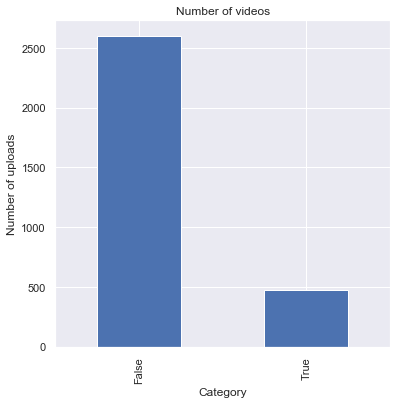

In [113]:
fig = plt.figure(figsize=(6,6)) 
ax = fig.gca()  

counts.plot.bar(ax = ax) 

ax.set_title('Number of videos') 
ax.set_xlabel('Category') 
ax.set_ylabel('Number of uploads')
##Only 15% of the videos have higher engagements in terms of Views.

In [48]:
gb_df1.head()

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,...,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,approval_rating,greater_than_mean_views
18888,n26wtR-OFr8,2017-12-07,Mountain Bikers Worried About Military Land Be...,That's Surrey TV,25,News & Politics,2017-11-27,18:08:49,"Surrey|""That's TV""|""That's Surrey""|""mountain b...",1014,...,1,3,https://i.ytimg.com/vi/n26wtR-OFr8/default.jpg,False,False,False,A group of mountain bikers are concerned that ...,GB,1.282051,False
22626,vPsic3dEndc,2017-12-12,QUIZ : Name the Trail : A Christmas Cracker,The 2Inch of Gnar,22,People & Blogs,2017-12-01,11:34:30,"MTB|""Mountain Biking""|""Bike""|""Bird""|""Aeris""|""B...",1228,...,0,1,https://i.ytimg.com/vi/vPsic3dEndc/default.jpg,False,False,False,A Bad Brains Christmas Cracker! - #NameTheTrai...,GB,0.162866,False
6902,NcVxrr_q3Hw,2017-11-22,George Durack | Remembrance Sunday | You Can't...,Official Jeremy Corbyn Channel,26,Howto & Style,2017-11-12,07:37:46,[none],1583,...,12,37,https://i.ytimg.com/vi/NcVxrr_q3Hw/default.jpg,False,False,False,"Ahead of Remembrance Sunday, I visited my frie...",GB,5.685407,False
2961,au3S8F08v54,2017-11-17,New album Open Here out 2nd February,Field Music,10,Music,2017-11-07,10:04:31,"newmusic|""indie""|""bbc6music""|""alternative""|""Fi...",2254,...,0,9,https://i.ytimg.com/vi/au3S8F08v54/default.jpg,False,False,False,"Preorder 'Open Here' on transparent 180g LP, ...",GB,1.996451,False
31878,NXin9D2Nc10,2017-12-23,Scarlets VS Benetton. Highlights GAME Champion...,Fahd W Rugby,17,Sports,2017-12-09,21:49:00,"Scarlets|""Benetton""|""Champions Cup""",2881,...,0,0,https://i.ytimg.com/vi/NXin9D2Nc10/default.jpg,False,False,False,Scarlets 33 - 28 Benetton Highlights GAME Cham...,GB,0.312392,False


In [44]:
gb_df1['greater_than_mean_views'].describe()

count      3070
unique        2
top       False
freq       2600
Name: greater_than_mean_views, dtype: object

In [122]:
most_viewed_df = gb_df1[gb_df1['greater_than_mean_views'] == True]

In [62]:
b=most_viewed_df.head(2)

In [103]:
# Counts of trending videos per GB channel_title
a = most_viewed_df.groupby(['channel_title']).size().reset_index(name='counts')
a.sort_values(['counts'], ascending=False)
#The channels with the most stable videos were as follow;

,channel_title,counts
212,SMTOWN,7
283,ibighit,7
161,Marvel Entertainment,6
43,Cardi B,5
74,EminemVEVO,5
...,...,...
121,John Mayer,1
122,JuanesVEVO,1
123,JustDestiny,1
124,K-MUSIC,1


In [69]:
best_channels = most_viewed_df[most_viewed_df['channel_title'].isin(['SMTOWN','ibighit'])][['channel_title','title','category','views','likes','dislikes']]

In [116]:
counts = best_channels['category'].value_counts()
counts

Music    14
Name: category, dtype: int64

Text(0, 0.5, 'Number of uploads')

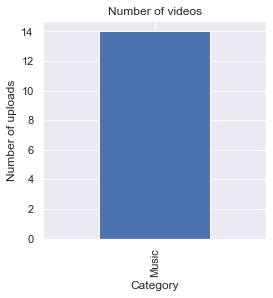

In [118]:
fig = plt.figure(figsize=(4,4)) 
ax = fig.gca()  

counts.plot.bar(ax = ax) 

ax.set_title('Number of videos') 
ax.set_xlabel('Category') 
ax.set_ylabel('Number of uploads')

#most consistent channels in terms of views are Music channels.

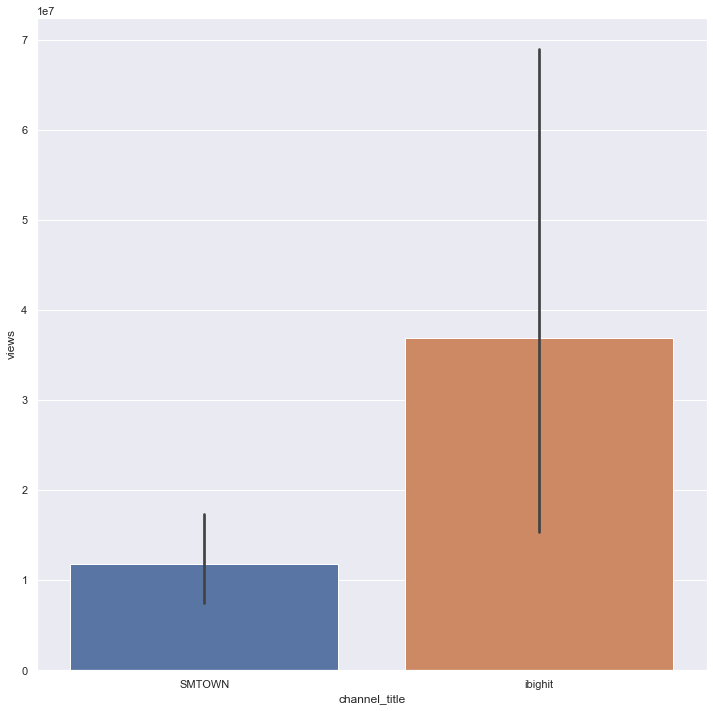

In [74]:
ax = sns.barplot(x= 'channel_title', y='views', data= best_channels)

In [76]:
best_channels[best_channels['channel_title'].isin(['ibighit'])][['channel_title','title','category','views','likes','dislikes']]

,channel_title,title,category,views,likes,dislikes
8816,ibighit,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,Music,8484137,1066852,5230
169971,ibighit,BTS (방탄소년단) 'FAKE LOVE' Official MV (Extended ...,Music,12709520,1817699,11949
116648,ibighit,j-hope 'Airplane' MV,Music,15635625,1841936,12330
139461,ibighit,BTS (방탄소년단) 'Euphoria : Theme of LOVE YOURSELF...,Music,20721039,2250087,20951
91385,ibighit,j-hope 'Daydream (백일몽)' MV,Music,23416810,2672433,29088
18822,ibighit,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,Music,54083634,2960250,57944
160289,ibighit,BTS (방탄소년단) 'FAKE LOVE' Official MV,Music,123010920,5613827,206892


In [83]:
ibighit_df = best_channels[best_channels['channel_title'].isin(['ibighit'])][['channel_title','title','category','views','likes','dislikes']]

In [84]:
ID = [1, 2,3,4,5,6,7] 

In [108]:
ibighit_df['ID'] = ID
ibighit_df.head(7)

,channel_title,title,category,views,likes,dislikes,ID
8816,ibighit,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,Music,8484137,1066852,5230,1
169971,ibighit,BTS (방탄소년단) 'FAKE LOVE' Official MV (Extended ...,Music,12709520,1817699,11949,2
116648,ibighit,j-hope 'Airplane' MV,Music,15635625,1841936,12330,3
139461,ibighit,BTS (방탄소년단) 'Euphoria : Theme of LOVE YOURSELF...,Music,20721039,2250087,20951,4
91385,ibighit,j-hope 'Daydream (백일몽)' MV,Music,23416810,2672433,29088,5
18822,ibighit,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,Music,54083634,2960250,57944,6
160289,ibighit,BTS (방탄소년단) 'FAKE LOVE' Official MV,Music,123010920,5613827,206892,7


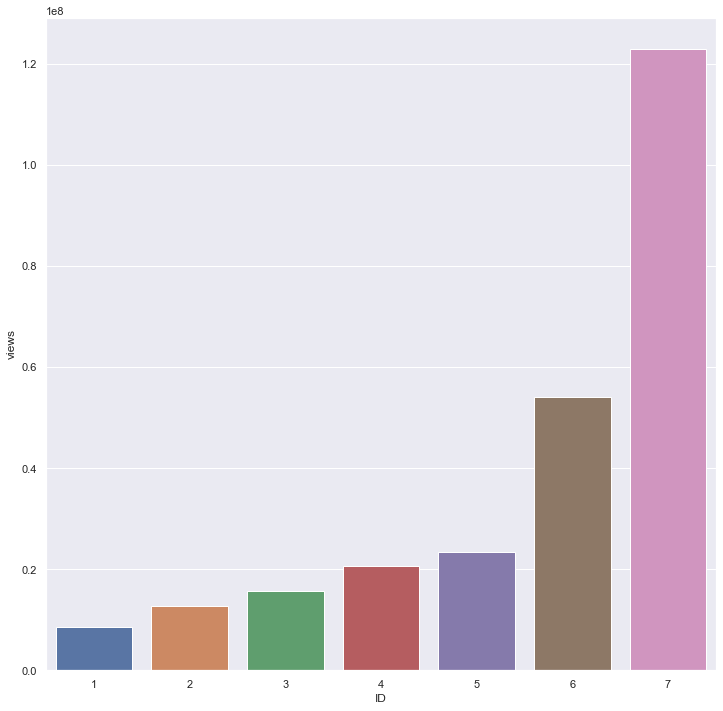

In [90]:
ax = sns.barplot(x= 'ID', y='views', data= ibighit_df)

#8.5-23 mll trend

In [91]:
smtown_df = most_viewed_df[most_viewed_df['channel_title'].isin(['SMTOWN'])][['channel_title','title','category','views','likes','dislikes']]

In [94]:
ID = [1, 2,3,4,5,6,7] 

In [96]:
smtown_df['ID'] = ID
smtown_df.head(7)

,channel_title,title,category,views,likes,dislikes,ID
111028,SMTOWN,NCT 127 엔시티 127 'TOUCH' MV,Music,6682726,435537,3829,1
23976,SMTOWN,EXO 'Electric Kiss' MV -Short Ver.-,Music,6924540,657782,10898,2
38236,SMTOWN,EXO 엑소 'Universe' MV,Music,7201892,833114,10990,3
61984,SMTOWN,JONGHYUN 종현 '빛이 나 (Shinin’)' MV,Music,7800545,1040583,2822,4
167398,SMTOWN,SHINee 샤이니 '데리러 가 (Good Evening)' MV,Music,9486589,763365,3600,5
13821,SMTOWN,Red Velvet 레드벨벳 '피카부 (Peek-A-Boo)' MV,Music,18778325,661110,21949,6
149317,SMTOWN,SUPER JUNIOR 슈퍼주니어 'Lo Siento (Feat. Leslie Gr...,Music,25910075,1006918,16389,7


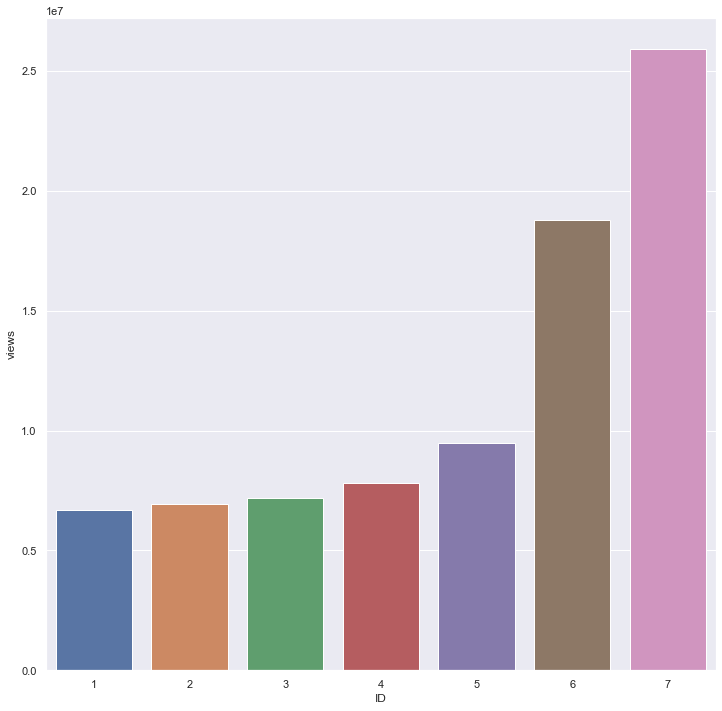

In [134]:
ax = sns.barplot(x= 'ID', y='views', data= smtown_df)

#7-10 mll trend

* Conclusions:
    Russia is the country with the highest count of video uploads.
    GB is the least active country in video uploads but the highest country in terms of engagements.
    Most videos in GB have a 0-10 mln overall viewership trend and only a very small portion exceed in very high rates in engagements(views, likes, dislikes)
    Only 15% of the videos in GB have higher views than the average.
    The channels with the max count of trending videos come from the Music Categories.
    Only 1 video per trending channel, over exceeds the growing engagement trend per video.